### BREAST CANCER DETECTION USING THE WISCONSIN DATA SET

How was breast cancer diagnosed in this study? Diagnosis of breast cancer is traditionally done by a full biopsy which is an invasive surgical method. A less invasive method called Fine Needle Biopsy (FNB), allows for examination of a small amount of tissue from the tumor.

This dataset was obtained by analyzing the cell nuclei characteristics of 569 images obtained by Fine Needle Aspiration of the breast mass. Each of the images are classified(diagnosed) as being “Benign” or “Malignant”.



The data set is downloadable here: [Kaggle](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)

#### Import Relevant Libraries

In [1]:
#Importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Load the data and check its properties

In [3]:
import pandas as pd
# Define the column names based on the dataset description
columns = [
    'ID', 'Diagnosis',
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
    'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

# Step 1: Read the data file into a DataFrame with the correct delimiter
df = pd.read_csv('/home/gloria/Documents/DATA/Breast-Cancer-Detection/DATA/Breast Cancer Prediction/breast+cancer+wisconsin+diagnostic/wdbc.data', delimiter=',', header=None)

# Step 2: Assign the column names to the DataFrame
df.columns = columns

# Step 3: Display the first few rows of the dataframe to verify
df.head()

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The diagnosis column has M and B. M shows that the final result obtained means that the nuclei obtained was malignant ie cancerous while B shows its Benign ie non cancerous.

In [4]:
df.shape

(569, 32)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

The data set contains no missing values and most of the coumns are in the correct data type

In [6]:
df.describe()

,ID,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


10 features can be obtained from observing a single nucleus cell: 

*radius (mean of distances from center to points on the perimeter)

texture (standard deviation of gray-scale values)

perimeter

area

smoothness (local variation in radius lengths)

compactness (perimeter² / area — 1.0)

concavity (severity of concave portions of the contour)

concave points (number of concave portions of the contour)

symmetry

fractal dimension (“coastline approximation” — 1)*

The features in the dataset (columns 3-32) aim to capture this cellular diversity within the sample. They provide information about:
Average Properties (Mean Features): These represent the average values (e.g., average size, average texture) across all the cells in the sample.

Variation Within the Sample (Standard Error Features): These indicate how much individual cell measurements deviate from the average (mean). A higher standard error suggests more variation in cell properties.

Extreme Values (Worst Features): These capture the most extreme values (largest size, highest roughness) observed in any cell within the sample.

#### Data Preprocessing

Mapping 1 and 0 to the Diagnosos Column. Malignant will be mapped to 1 whereas Benign will be mapped to 0

In [7]:
print("Malignant= 1, Benign = 0")
df["Diagnosis"]= df["Diagnosis"].map(lambda row: 1 if row=='M' else 0)

Malignant= 1, Benign = 0


In [8]:
df.head()

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Data Analysis

Countplot to show distribution of the Benign and Malignant over the whole dataset

In [9]:
#Plot the number of data points with mailgnant and benign as their diagnosis
print("Total number of data points =  ", len(df))
print("Malignant (diagnosis =1) = {}%".format(round(df["Diagnosis"].mean(),3)*100))
                             
print("Benign (diagnosis =0)= {}%".format((1-round(df["Diagnosis"].mean(),3))*100))


Total number of data points =   569
Malignant (diagnosis =1) = 37.3%
Benign (diagnosis =0)= 62.7%


Creating a bar chart that displays the number of data points (unique IDs) for each diagnosis category (malignant and benign) in the dataset. 

<Axes: title={'center': 'Malignant (1) vs Benign Data(0) points'}, xlabel='Diagnosis', ylabel='Number of data points'>

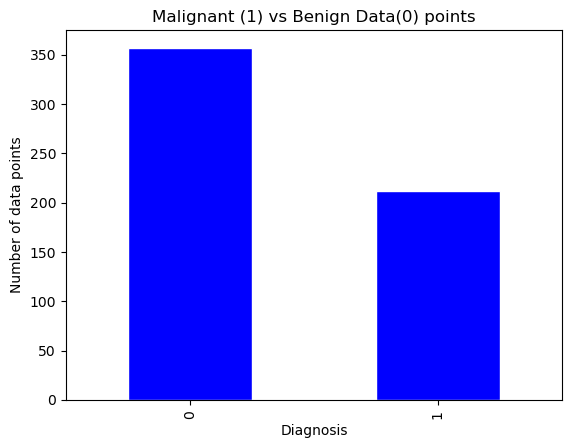

In [10]:
df.groupby("Diagnosis")['ID'].count().plot.bar(ylabel = "Number of data points", title = "Malignant (1) vs Benign Data(0) points", color = 'blue', edgecolor = "white")

There is not such an imbalance on the data between the 2 diagnoses

Using the mean value columns to create a pair plots and check the distribution of the features using a diagnostic hue.

Also checking the distribution oor the data if it is a normal curve before plotting a correlation matrix 

In [11]:
columns_mean=('Diagnosis', 'radius_mean','texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean')
df_mean = pd.DataFrame(df,columns = columns_mean)


In [12]:
df_mean= df_mean.drop('concave points_mean', axis=1) 

In [13]:
df_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Diagnosis               569 non-null    int64  
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   symmetry_mean           569 non-null    float64
 9   fractal_dimension_mean  569 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 44.6 KB


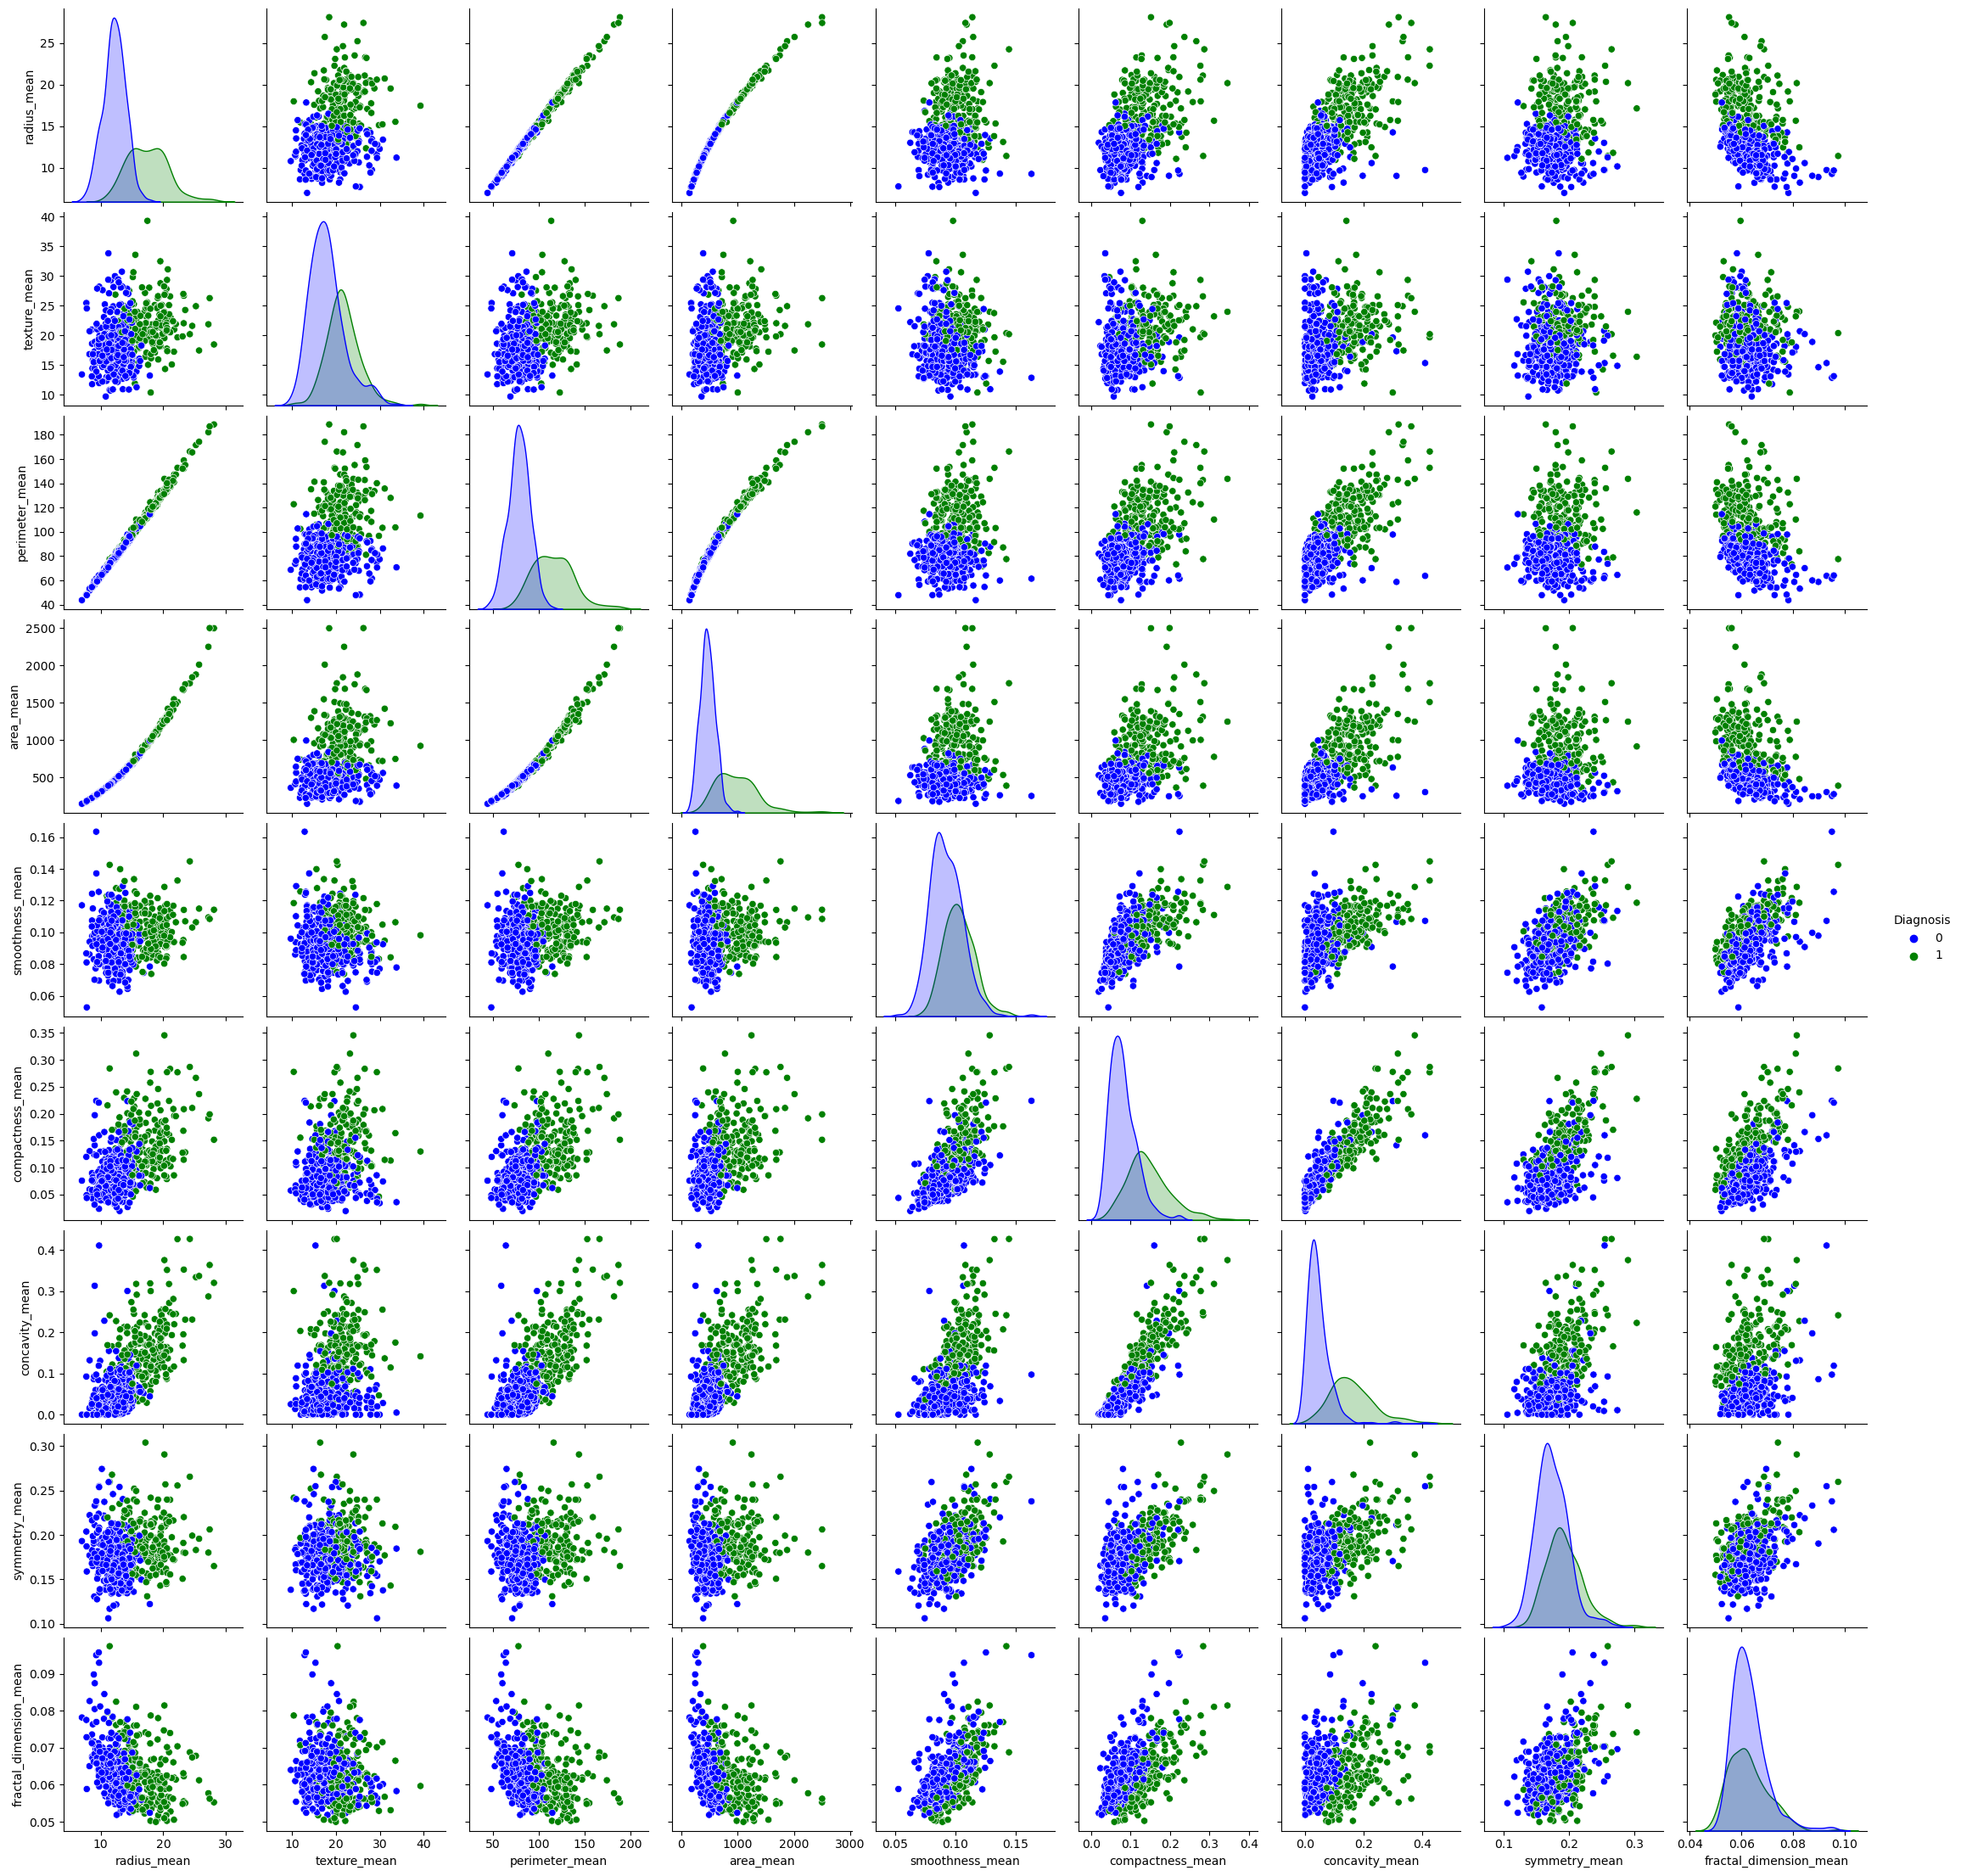

In [14]:
sns.pairplot(df_mean, hue = "Diagnosis", diag_kind='kde',palette = ["blue","green"])

There is a certain level of separation between the malignant and the benign data types which can make it helpful to use these features to design a machine learning algorithm.There is still also a lot of dispariety with the scatter plot distributon with benign diagnosis higher than malignant ie: 

Malignant (diagnosis =1) = 37.3%
Benign (diagnosis =0)= 62.7%

#### Histogram

IndexError: index 30 is out of bounds for axis 0 with size 30

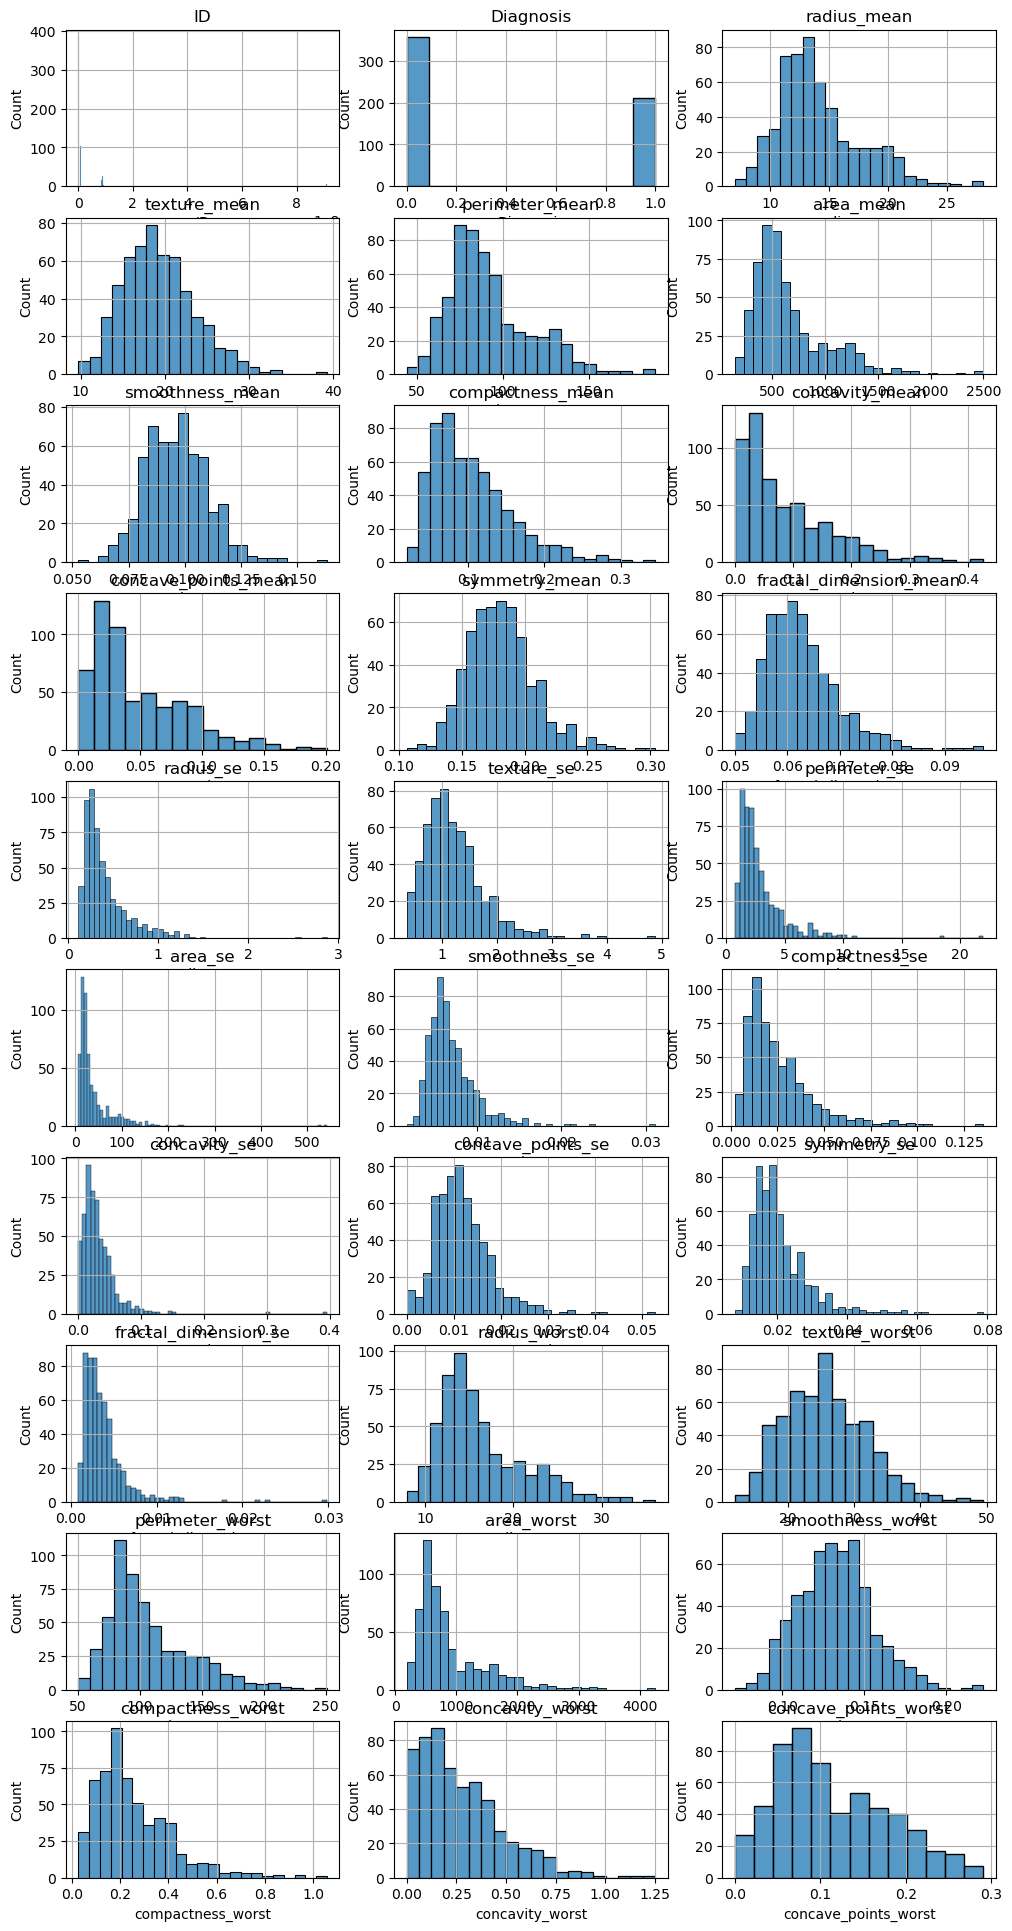

In [15]:
# Create a figure for subplots (adjust figsize for more columns)
fig, axes = plt.subplots(nrows=len(df.columns) // 3, ncols=3, figsize=(12, 24))  # Adjust figsize for number of columns

# Iterate through columns and create histograms using seaborn
for i, col in enumerate(df.columns):
    ax = axes.flat[i]  # Flatten the subplot matrix for easier access
    sns.histplot(df[col], ax=ax)  # Create seaborn histogram for each column
    ax.set_title(col)  # Set title for each subplot
    ax.grid(True)  # Add grid lines for better readability

# Adjust layout (optional, adjust based on number of columns)
if len(df.columns) % 3 != 0:  # Handle cases with leftover columns
    for i in range(len(df.columns) % 3):
        axes.flat[-i - 1].axis('off')  # Hide unused subplots

plt.tight_layout()
plt.subplots_adjust(bottom=0.3)  # Adjust spacing between subplots
plt.show();

#### Correlation matrix

In [16]:
import seaborn as sns
import matplotlib
import matplotlib.pylab as plt

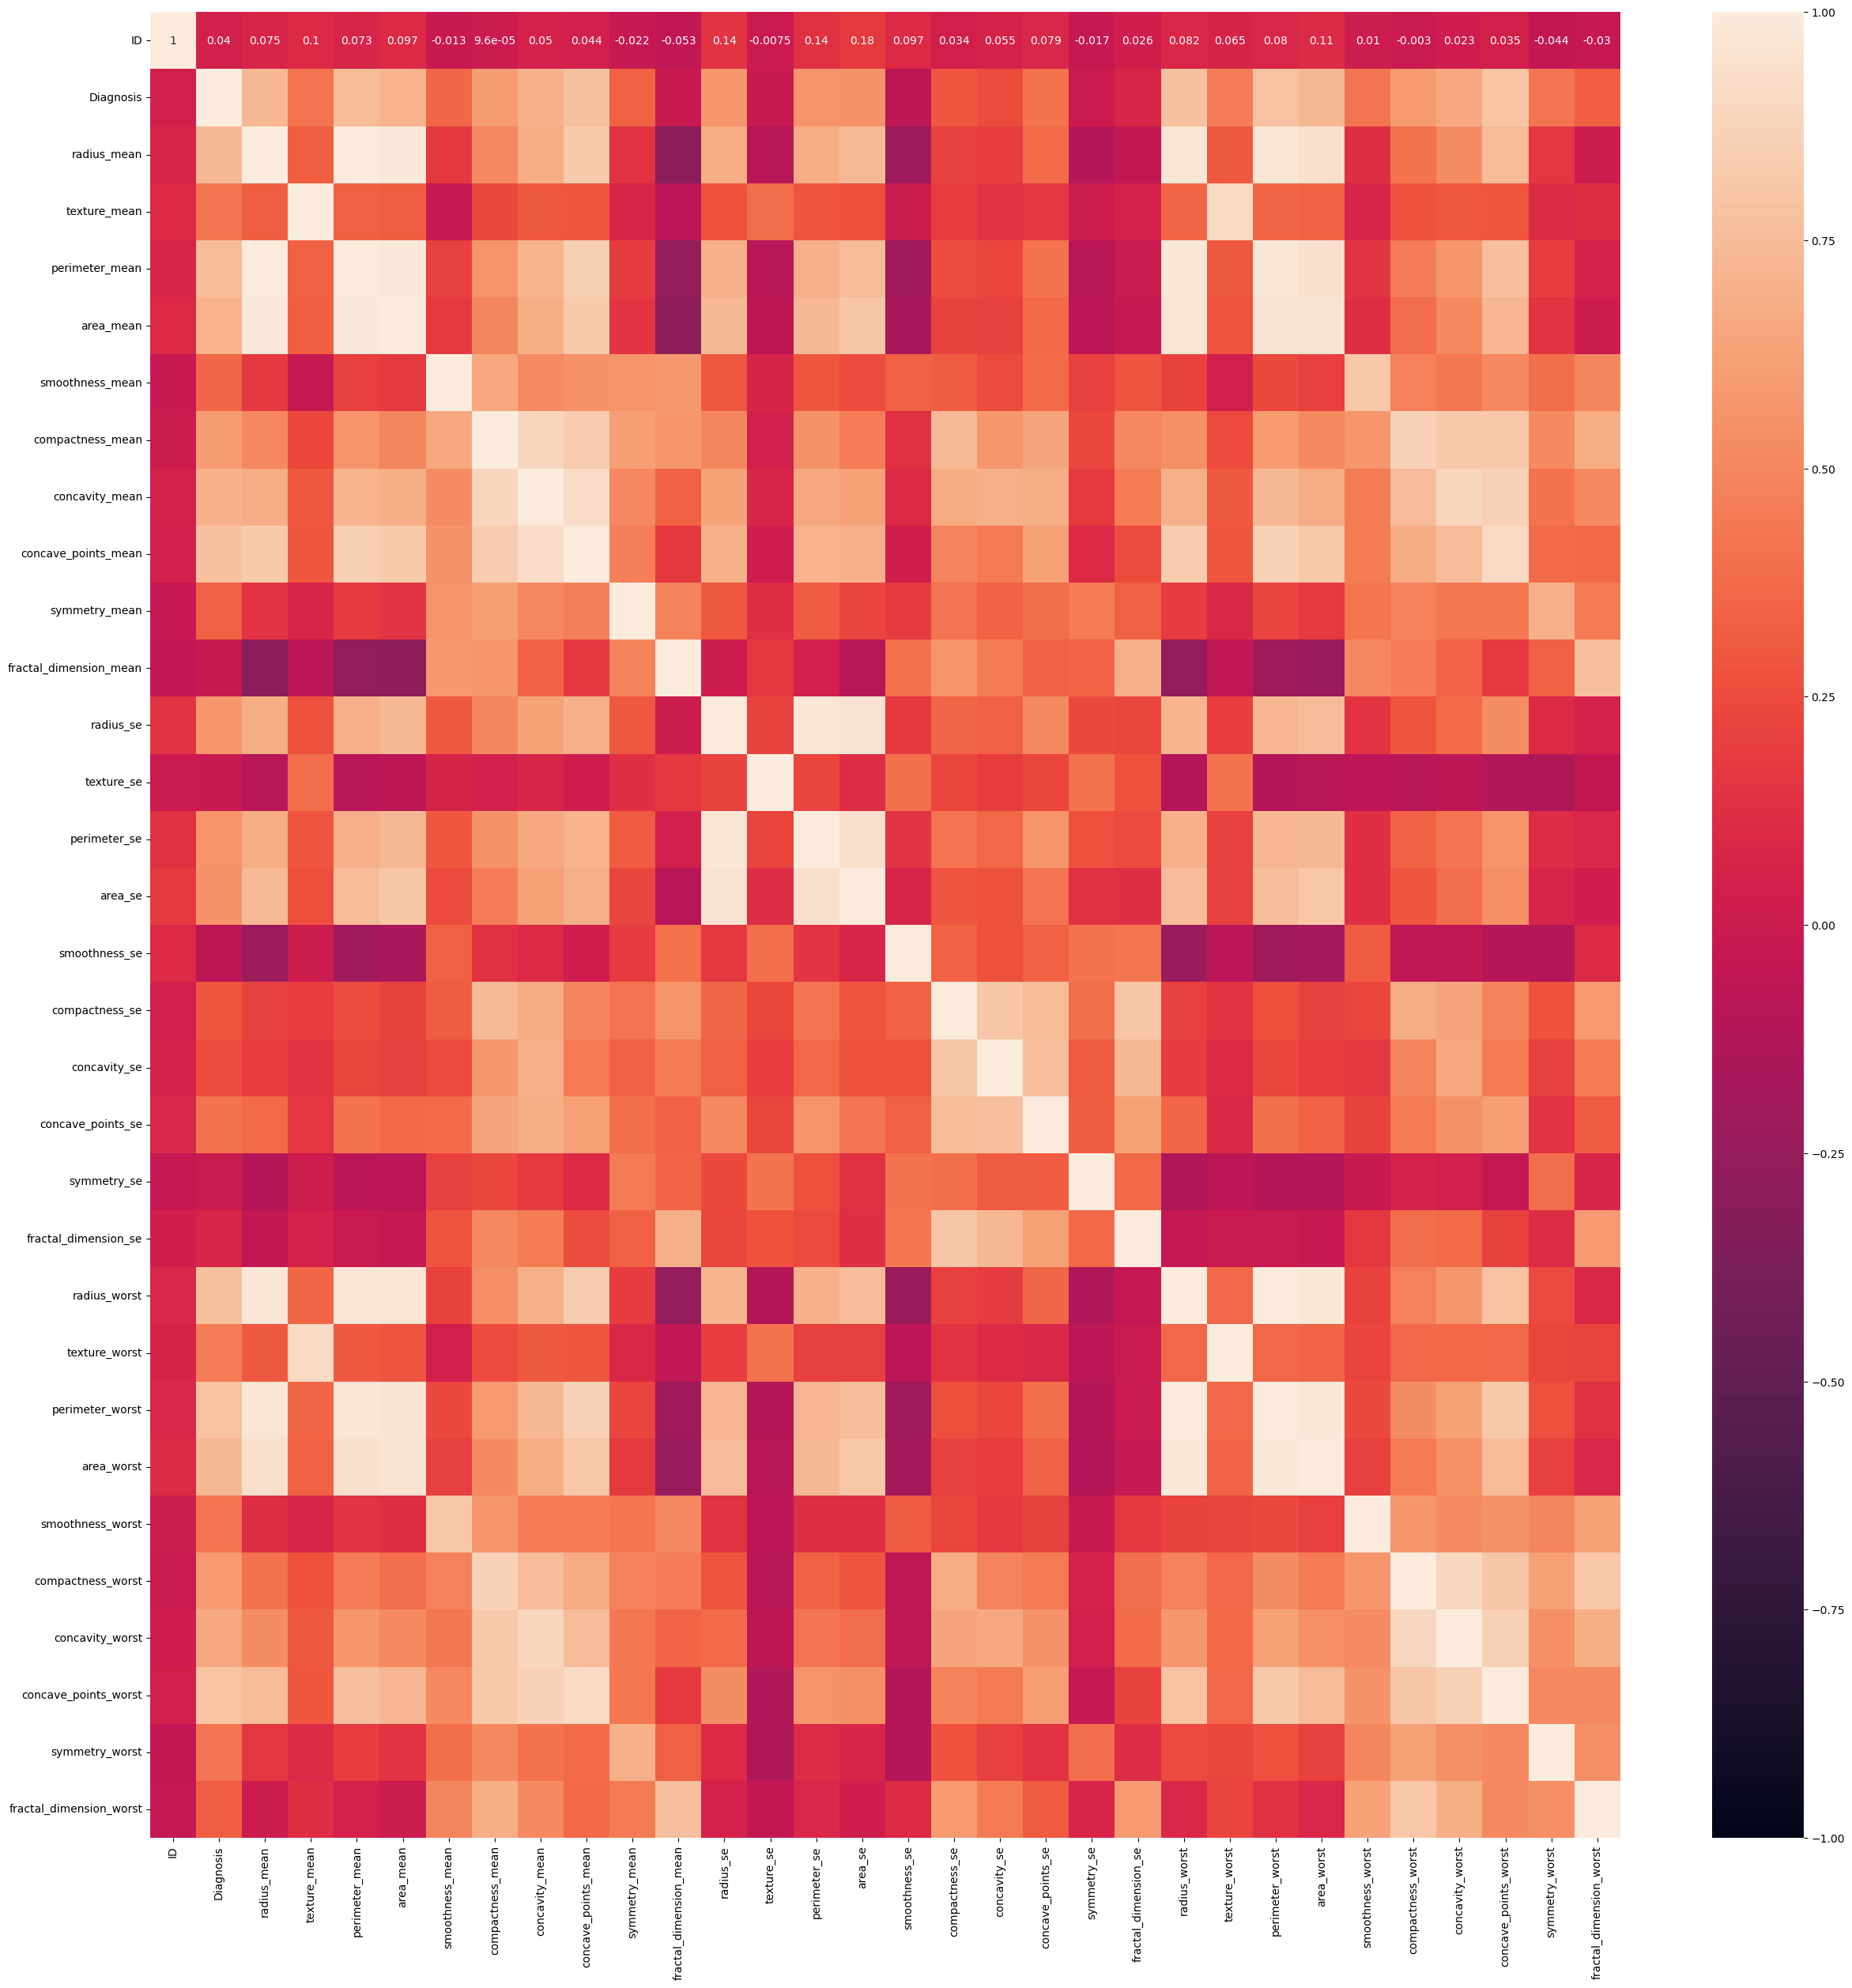

In [17]:
plt.figure(figsize =(30,30))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

<Axes: >

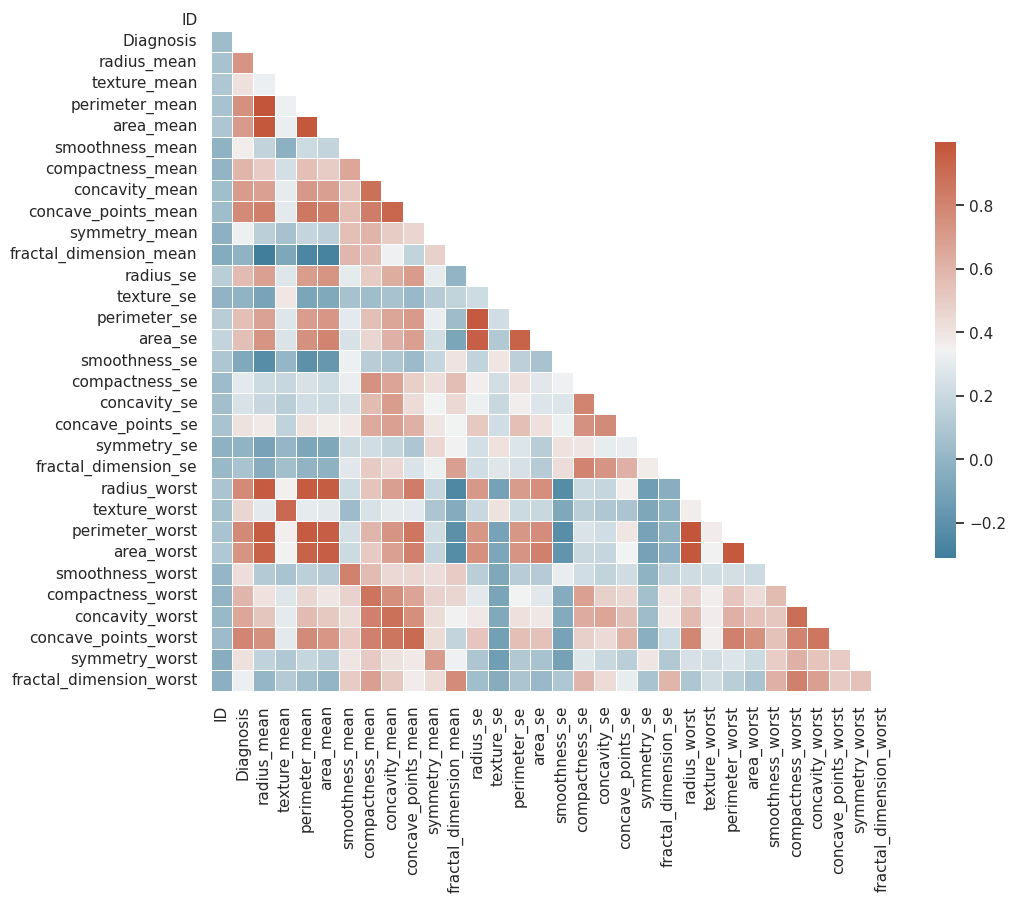

In [18]:
sns.set_theme(style="white")
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap,square=True, linewidths=.5, cbar_kws={"shrink": .6})

In a correlation heat map, the way its interpreted is higher the correlation value, the more correlated the two variables(features) are:

Radius, Area and Perimeter are correlated (corr>0.9) which is obvious as area and perimeter is calculated using the radius values.

Texture_mean and texture_worst are higly correlated with corr_value = 0.98 (texture_worst is the largest value of all the textures).

Compactness_mean,concavity_mean,concave_points_mean are also highy correlated with values in range 0.7 to 0.9.

Symmetry_mean and symmetry_worst are correlated too by values 0.7.

Fractural_dimension_mean and fractural_dimension_worst are correlated by value 0.77

#### Applying SMOTE to balance the dataset

SMOTE is an oversampling technique used to address class imbalance in machine learning datasets. When one class (minority class) has significantly fewer samples compared to another class (majority class), it can lead to biased models that favor the majority class. SMOTE helps balance the class distribution by synthetically generating new samples for the minority class

Split the data into training and testing sets using train_test_split. This step is recommended before applying  SMOTE to avoid overfitting on the oversampled data.

In [19]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [20]:
# Separate features (X) and target variable (y)
X = df.drop('Diagnosis', axis=1)  # Features without the diagnosis column
y = df['Diagnosis']  # Target variable (diagnosis)

# Split data into training and testing sets (optional, recommended)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the SMOTE object (adjust k_neighbors as needed)
smote = SMOTE(k_neighbors=5)

# Oversample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


print("Original training set shape:", X_train.shape, y_train.shape)
print("Oversampled training set shape:", X_train_resampled.shape, y_train_resampled.shape)



Original training set shape: (455, 31) (455,)
Oversampled training set shape: (572, 31) (572,)


Using x_train_resampled anf y_train_resampled to train my model

#### PCA analysis



Principal Component Analysis (PCA) is a statistical procedure that uses an orthogonal transformation that converts a set of correlated variables to a set of uncorrelated variables.PCA is the most widely used tool in exploratory data analysis and in machine learning for predictive models.

Moreover, 
Principal Component Analysis (PCA) is an unsupervised learning algorithm technique used to examine the interrelations among a set of variables. It is also known as a general factor analysis where regression determines a line of best fit. 

The main goal of Principal Component Analysis (PCA) is to reduce the dimensionality of a dataset while preserving the most important patterns or relationships between the variables without any prior knowledge of the target variables. 

Will use PCA for both data visualization and Data compression 

#### Data Visualization


In [21]:
from sklearn.decomposition import PCA

In [33]:
pca = PCA(n_components=2)  # Choose the number of principal components (usually 2 or 3 for visualization)


In [34]:
pca_transformed = pca.fit_transform(df)  # Transform the data using PCA


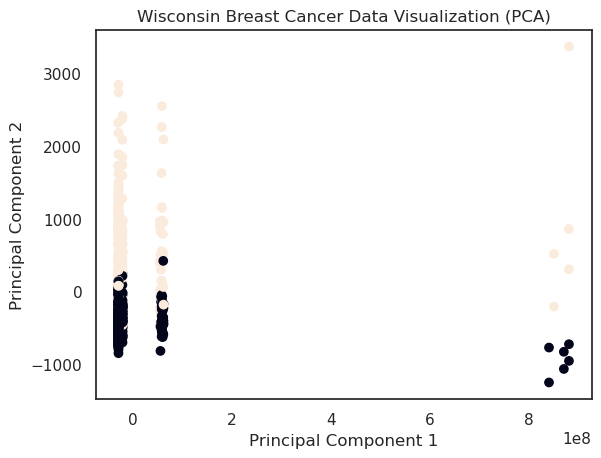

In [36]:
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], c=df['Diagnosis'])  # Scatter plot with color-coded classes
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Wisconsin Breast Cancer Data Visualization (PCA)')
plt.show()


In [32]:
min_components= 15
# Define the desired compression ratio -  90% of variance)
compression_ratio = 0.9

# Create PCA object
pca = PCA(n_components=None)  # Initially set n_components to None

# Fit PCA to training data to determine explained variance ratio
pca.fit(X_train_resampled)

# Calculate the cumulative explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Find the number of components needed to achieve the desired compression ratio
num_components = np.argmax(cumulative_variance >= compression_ratio) +1

# Enforce minimum components if necessary
if num_components < min_components:   
    num_components = min_components
    print("WARNING: Reduced compression to use minimum", min_components, "components.")

# Create a new PCA object with the chosen number of components
pca = PCA(n_components=num_components)

# Transform training and testing data using PCA
X_train_compressed = pca.fit_transform(X_train_resampled)
X_test_compressed = pca.transform(X_test)

print("Original training data shape:", X_train_resampled.shape)
print("Compressed training data shape:", X_train_compressed.shape)

# Use X_train_compressed and X_test_compressed for further analysis or training models


Original training data shape: (572, 31)
Compressed training data shape: (572, 15)


#### Modelling


Logistics Regression, Decision Trees, Random Forest Classifier

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from IPython.display import display, HTML
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import GridSearchCV


In [38]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, f1_score, precision_score


Key Points:

*Precision: The percentage of correctly predicted positive observations out of the total predicted positives. A high precision indicates low false positives.

*Recall: The percentage of actual positive observations correctly predicted out of the total actual positives. High recall indicates low false negatives.

*F1-Score: The weighted average of precision and recall. It is a balance between precision and recall.

*Accuracy: The overall accuracy of the model in predicting both positive and negative instances.

In [42]:
def modelplotting_andevaluation(X_train_compressed,X_test_compressed,y_train_resampled,y_test):
    Results = {'Model': [], 'Accuracy': [], 'Recall': [], 'Precision': [], 'F1': []}

    lr = LogisticRegression()
    dc = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    knn = KNeighborsClassifier(n_neighbors=5)

    model_list= [lr,dc,rf,knn]

    for models in model_list:
        models.fit(X_train_compressed, y_train_resampled)

        y_pred = models.predict(X_test_compressed)

        print('Model :', models)
        print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')

        print('confusion matrix :', confusion_matrix(y_test, y_pred))
        print('classification_report:', classification_report(y_test, y_pred))
        print('accuracy_score:', accuracy_score(y_test, y_pred))
        print('precision_score:', precision_score(y_test, y_pred))
        print('recall_score:', recall_score(y_test, y_pred))
        print('f1 :', f1_score(y_test, y_pred))
        print()

        R = {'Model': str(models),
                'Accuracy': accuracy_score(y_test, y_pred),
                'Recall': recall_score(y_test, y_pred),
                'Precision': precision_score(y_test, y_pred),
                'F1': f1_score(y_test, y_pred)
            }

        Results['Model'].append(R['Model'])
        Results['Accuracy'].append(R['Accuracy'])
        Results['Recall'].append(R['Recall'])
        Results['Precision'].append(R['Precision'])
        Results['F1'].append(R['F1'])

    return pd.DataFrame(Results)


In [43]:
evaluation_results= modelplotting_andevaluation(X_train_compressed,X_test_compressed,y_train_resampled,y_test)

Model : LogisticRegression()
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
confusion matrix : [[71  0]
 [ 9 34]]
classification_report:               precision    recall  f1-score   support

           0       0.89      1.00      0.94        71
           1       1.00      0.79      0.88        43

    accuracy                           0.92       114
   macro avg       0.94      0.90      0.91       114
weighted avg       0.93      0.92      0.92       114

accuracy_score: 0.9210526315789473
precision_score: 1.0
recall_score: 0.7906976744186046
f1 : 0.8831168831168831

Model : DecisionTreeClassifier()
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
confusion matrix : [[68  3]
 [ 4 39]]
classification_report:               precisi